# Correlation between largest Banks & Nifty Indices by analysing one minute candlestick using Python

In [1]:
#Importing libraries that we need

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/stock-market-india/FullData.h5
/kaggle/input/stock-market-india/FullDataCsv/SUNTV__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/MANAPPURAM__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/GODREJPROP__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/PFIZER__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/ICICIBANK__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/DRREDDY__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/HDFCBANK__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/NAM_INDIA__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/SANOFI__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/BEL__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/MARUTI__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/SYNGENE__EQ__NSE__NSE__MINUTE.csv
/kagg

## Creating a variable for each dataset

In [2]:
hdfc = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/HDFCBANK__EQ__NSE__NSE__MINUTE.csv',index_col='timestamp')
bank_nifty = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/NIFTY_BANK__EQ__INDICES__NSE__MINUTE.csv',index_col='timestamp')
kotak = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/KOTAKBANK__EQ__NSE__NSE__MINUTE.csv',index_col='timestamp')
icici = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/ICICIBANK__EQ__NSE__NSE__MINUTE.csv',index_col='timestamp')
axis = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/AXISBANK__EQ__NSE__NSE__MINUTE.csv',index_col='timestamp')
sbi = pd.read_csv("/kaggle/input/stock-market-india/FullDataCsv/SBIN__EQ__NSE__NSE__MINUTE.csv",index_col='timestamp')
nifty_fin_ser = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/NIFTY_FIN_SERVICE__EQ__INDICES__NSE__MINUTE.csv',index_col='timestamp')
nifty_50 = pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/NIFTY_50__EQ__INDICES__NSE__MINUTE.csv',index_col='timestamp')

In [4]:
sbi.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00+05:30,252.40,253.60,251.60,251.85,297611.0
2017-01-02 09:16:00+05:30,251.85,252.40,251.35,251.40,192754.0
2017-01-02 09:17:00+05:30,251.45,251.70,251.20,251.20,131924.0
2017-01-02 09:18:00+05:30,251.20,251.20,250.55,250.75,225075.0
2017-01-02 09:19:00+05:30,250.75,250.75,250.00,250.25,215535.0


# dropping unnecessary columns

In [5]:
list=[hdfc,bank_nifty,kotak,icici,axis,sbi,nifty_fin_ser,nifty_50]
for i in list:
    i.drop('volume',axis=1,inplace=True)
    print(i)

                              open     high      low    close
timestamp                                                    
2017-01-02 09:15:00+05:30   605.00   605.00   601.00   601.45
2017-01-02 09:16:00+05:30   601.45   602.35   601.45   602.00
2017-01-02 09:17:00+05:30   601.95   602.35   599.25   599.25
2017-01-02 09:18:00+05:30   599.25   600.35   599.00   600.35
2017-01-02 09:19:00+05:30   600.35   600.50   599.75   600.00
...                            ...      ...      ...      ...
2021-01-01 15:25:00+05:30  1424.35  1425.30  1423.00  1424.00
2021-01-01 15:26:00+05:30  1423.95  1424.40  1421.65  1423.00
2021-01-01 15:27:00+05:30  1423.00  1423.00  1422.10  1422.80
2021-01-01 15:28:00+05:30  1422.80  1422.90  1421.50  1421.50
2021-01-01 15:29:00+05:30  1421.95  1423.45  1421.20  1423.45

[370546 rows x 4 columns]
                               open      high       low     close
timestamp                                                        
2017-01-02 09:15:00+05:30  18242.30

# Calculating returns of stocks and indices for one minute timeframe

In [6]:
fin_df = [hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50]
for i in fin_df:
    i['Difference'] = (i['open']-i['close'])/i['open']*100
    i.drop(['open','high','close','low'],axis=1,inplace=True)
    print(i)

                           Difference
timestamp                            
2017-01-02 09:15:00+05:30    0.586777
2017-01-02 09:16:00+05:30   -0.091446
2017-01-02 09:17:00+05:30    0.448542
2017-01-02 09:18:00+05:30   -0.183563
2017-01-02 09:19:00+05:30    0.058299
...                               ...
2021-01-01 15:25:00+05:30    0.024573
2021-01-01 15:26:00+05:30    0.066716
2021-01-01 15:27:00+05:30    0.014055
2021-01-01 15:28:00+05:30    0.091369
2021-01-01 15:29:00+05:30   -0.105489

[370546 rows x 1 columns]
                           Difference
timestamp                            
2017-01-02 09:15:00+05:30    0.523718
2017-01-02 09:16:00+05:30   -0.099275
2017-01-02 09:17:00+05:30    0.232668
2017-01-02 09:18:00+05:30    0.159793
2017-01-02 09:19:00+05:30    0.038907
...                               ...
2021-01-01 15:25:00+05:30    0.056824
2021-01-01 15:26:00+05:30   -0.028431
2021-01-01 15:27:00+05:30   -0.037904
2021-01-01 15:28:00+05:30   -0.009472
2021-01-01 15:29:00+05:

# concatenating the DataFrames vertically and changing their column names

In [7]:
concat_df = pd.concat(fin_df, axis=1, ignore_index=True)
concat_df

,0,1,2,3,4,5,6,7
2017-01-02 09:15:00+05:30,0.586777,0.523718,0.044307,0.334936,-0.048625,0.217908,0.579114,0.250301
2017-01-02 09:16:00+05:30,-0.091446,-0.099275,0.077580,-0.014300,0.194404,0.178678,-0.105410,-0.014654
2017-01-02 09:17:00+05:30,0.448542,0.232668,0.266371,0.281277,0.020870,0.099423,0.296313,0.200851
2017-01-02 09:18:00+05:30,-0.183563,0.159793,-0.100156,-0.021230,-0.048706,0.179140,-0.038586,-0.051387
2017-01-02 09:19:00+05:30,0.058299,0.038907,-0.011117,0.080765,0.062591,0.199402,0.073077,0.042187
...,...,...,...,...,...,...,...,...
2017-07-10 12:25:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:26:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:27:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:28:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000


In [8]:
#[hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50]
new_col_name = {0:'hdfc', 1:'icici', 2:"axis", 3:'bank_nifty', 4:'kotak', 5:'sbi',6:'nifty_fin_ser',7:'nifty_50'}
concat_df.rename(columns=new_col_name, inplace=True)
concat_df

,hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50
2017-01-02 09:15:00+05:30,0.586777,0.523718,0.044307,0.334936,-0.048625,0.217908,0.579114,0.250301
2017-01-02 09:16:00+05:30,-0.091446,-0.099275,0.077580,-0.014300,0.194404,0.178678,-0.105410,-0.014654
2017-01-02 09:17:00+05:30,0.448542,0.232668,0.266371,0.281277,0.020870,0.099423,0.296313,0.200851
2017-01-02 09:18:00+05:30,-0.183563,0.159793,-0.100156,-0.021230,-0.048706,0.179140,-0.038586,-0.051387
2017-01-02 09:19:00+05:30,0.058299,0.038907,-0.011117,0.080765,0.062591,0.199402,0.073077,0.042187
...,...,...,...,...,...,...,...,...
2017-07-10 12:25:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:26:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:27:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000
2017-07-10 12:28:00+05:30,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000


# dropping null values. as they might affect our analysis

In [9]:
concat_df.isnull().sum()

hdfc             336
icici            337
axis             333
bank_nifty        64
kotak            336
sbi              337
nifty_fin_ser     64
nifty_50          64
dtype: int64

In [10]:
concat_df.dropna(axis=0,inplace = True)
concat_df

,hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50
2017-01-02 09:15:00+05:30,0.586777,0.523718,0.044307,0.334936,-0.048625,0.217908,0.579114,0.250301
2017-01-02 09:16:00+05:30,-0.091446,-0.099275,0.077580,-0.014300,0.194404,0.178678,-0.105410,-0.014654
2017-01-02 09:17:00+05:30,0.448542,0.232668,0.266371,0.281277,0.020870,0.099423,0.296313,0.200851
2017-01-02 09:18:00+05:30,-0.183563,0.159793,-0.100156,-0.021230,-0.048706,0.179140,-0.038586,-0.051387
2017-01-02 09:19:00+05:30,0.058299,0.038907,-0.011117,0.080765,0.062591,0.199402,0.073077,0.042187
...,...,...,...,...,...,...,...,...
2021-01-01 15:25:00+05:30,0.024573,0.056824,0.056058,0.074245,0.105147,0.017905,0.058261,0.031733
2021-01-01 15:26:00+05:30,0.066716,-0.028431,0.072115,0.037306,0.065134,0.017908,0.038530,0.003923
2021-01-01 15:27:00+05:30,0.014055,-0.037904,0.088205,0.007368,0.045114,-0.017912,-0.018450,0.003210
2021-01-01 15:28:00+05:30,0.091369,-0.009472,0.104300,0.028516,0.007521,0.000000,0.015155,0.020331


# Statistical Summary 

In [11]:
concat_df.describe()

,hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50
count,370362.000000,370362.000000,370362.000000,370362.000000,370362.000000,370362.000000,370362.000000,370362.000000
mean,0.000710,0.000576,0.000786,0.000207,0.000517,0.000648,0.000168,0.000362
std,0.077821,0.102615,0.114293,0.066306,0.096716,0.103526,0.060127,0.045407
min,-5.406876,-2.478674,-10.437419,-6.035976,-10.214992,-4.500000,-5.748363,-6.221983
25%,-0.028166,-0.037994,-0.039463,-0.023531,-0.034937,-0.039347,-0.021523,-0.016272
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.028871,0.040425,0.041017,0.023578,0.035719,0.041458,0.021486,0.016477
max,4.456907,2.429055,4.687500,2.679392,7.190086,4.275000,2.415263,2.395252


# Finding correlation

In [12]:
concat_df.corr()

,hdfc,icici,axis,bank_nifty,kotak,sbi,nifty_fin_ser,nifty_50
hdfc,1.000000,0.339305,0.336867,0.731982,0.362691,0.331090,0.740410,0.621194
icici,0.339305,1.000000,0.412388,0.705904,0.286460,0.435251,0.672642,0.595334
axis,0.336867,0.412388,1.000000,0.656542,0.308394,0.413084,0.603825,0.571882
bank_nifty,0.731982,0.705904,0.656542,1.000000,0.596695,0.647639,0.946818,0.859672
kotak,0.362691,0.286460,0.308394,0.596695,1.000000,0.299446,0.577743,0.523126
sbi,0.331090,0.435251,0.413084,0.647639,0.299446,1.000000,0.599758,0.589592
nifty_fin_ser,0.740410,0.672642,0.603825,0.946818,0.577743,0.599758,1.000000,0.887069
nifty_50,0.621194,0.595334,0.571882,0.859672,0.523126,0.589592,0.887069,1.000000


# displaying a pairplot to determine their correlation 

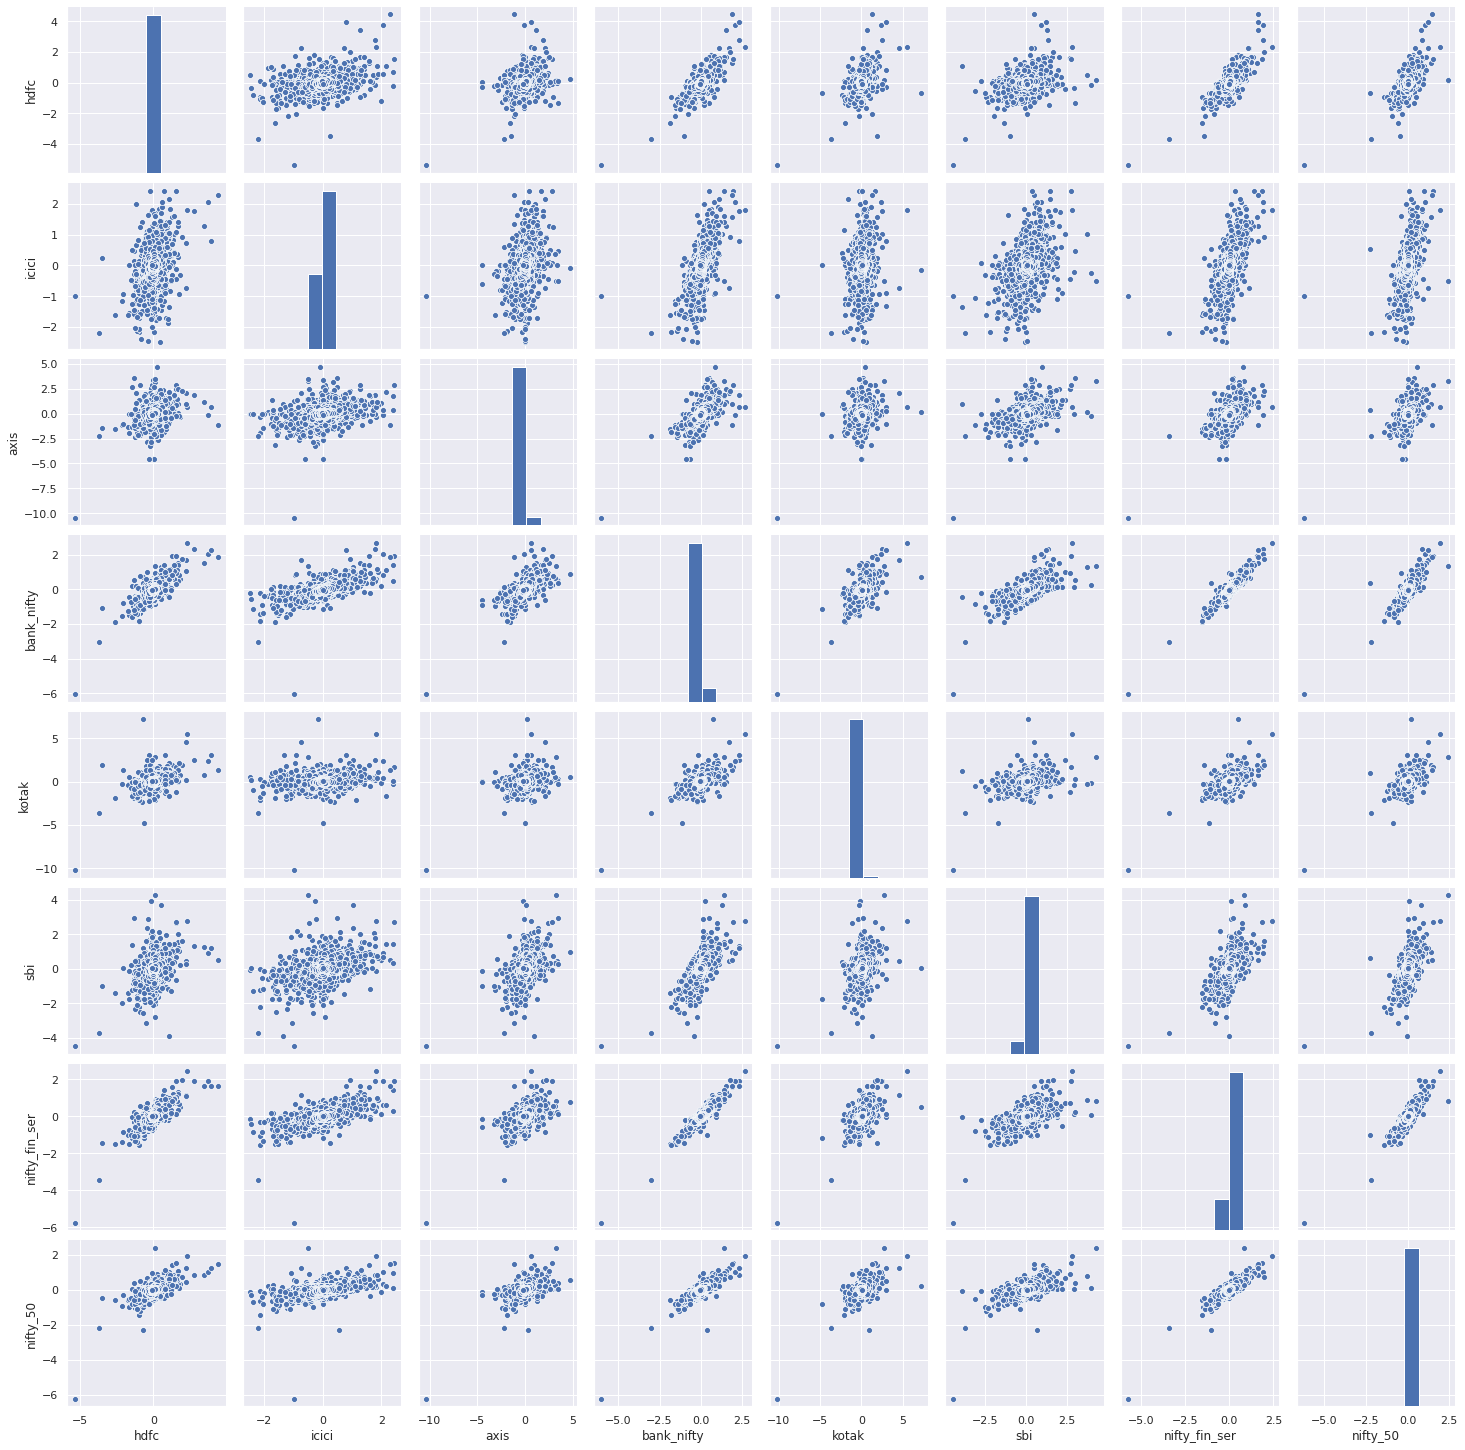

In [13]:
sns.set(font_scale=1)
sns.pairplot(data=concat_df)
plt.show()

# displaying a Heatmap to summarize their correlation 

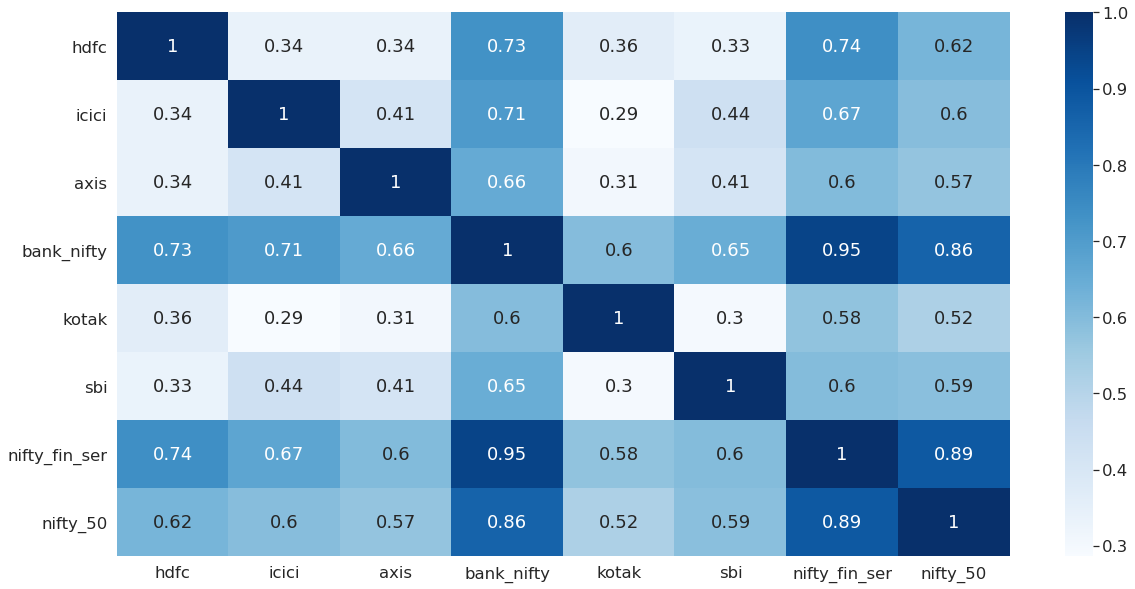

In [14]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.heatmap(data=concat_df.corr(),cmap="Blues",annot=True)
plt.show()